http://web.eecs.umich.edu/~mihalcea/downloads.html

In [48]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import semcor
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import random
import string
from pprint import pprint
from nltk.wsd import lesk

### Funzioni usate dall'algoritmo di Lesk

In [39]:
def get_context(sentence):
    # bag of words approach
    sentence.lower()
    tokens = word_tokenize(sentence) 
    tokens = list(filter(lambda token: token not in string.punctuation, tokens))
    wnl = nltk.WordNetLemmatizer()
    return [wnl.lemmatize(token.lower()) for token in tokens if token not in stopwords.words('english')] 

def get_gloss_examples(sense):
    gloss = get_context(sense.definition())
    examples = get_context(' '.join((sense).examples()))
    return gloss + examples

def get_overlap(list_1, list_2):
    return [value for value in list_1 if value in list_2]

### Algoritmo di Lesk

In [49]:
def my_lesk(word, sentence):
    if len(wn.synsets(word)) == 0:
        return None
    best_sense = wn.synsets(word)[0]
    max_overlap = 0
    context = get_context(sentence)
    signature = None
    overlap = None
    for sense in wn.synsets(word):
        signature = get_gloss_examples(sense)
        overlap = get_overlap(context, signature)
        if len(overlap) > max_overlap:
            max_overlap = len(overlap)
            best_sense = sense
    return best_sense

In [54]:
sentence = "you're a lucky dog, man"
print(my_lesk('dog', sentence))
print(lesk(sentence, 'dog'))

Synset('dog.n.03')
Synset('pawl.n.01')


### Funzioni utili per l'esecuzione dell'algoritmo di Lesk su 50 frasi scelte randomicamente da SemCor

In [42]:
def get_rand_elems(array):
    rands = random.sample(range(0, len(array)), 50)
    return [array[i] for i in rands]

def get_rand_elems_2(tagged_sentences):
    phrases = []
    extracted = []
    while len(phrases) < 50:
        rand = random.randint(0, len(tagged_sentences))
        if '\'NN\'' in str(tagged_sentences[rand]) and rand not in extracted and '.n.' in str(tagged_sentences[rand]):
            phrases.append(tagged_sentences[rand])
            extracted.append(rand)
    return phrases, extracted

def get_nouns(list_of_sentences):
    nouns = []
    #ps = PorterStemmer()
    #wnl = WordNetLemmatizer()
    for sentence in list_of_sentences:
        for word in sentence:
            if word.pos()[0][1] == 'NN' and '.n.' in str(word):
                nouns.append([word.leaves(), word.label()]) # coppia (parola, synset corretto)
                break
    return nouns    
     
def list_to_string(s):
    str1 = ''
    for ele in s:
        str1 += ele + ' '  
    return str1

### Esecuzione

Frasi annotatate con synset su SemCor

In [43]:
sentences = semcor.sents()
tagged_sentences = semcor.tagged_sents(tag="both")

esecuzione dell'algoritmo di Lesk su ogni sostantivo estratto

In [63]:
def execution(tagged_sentences, iterations):
    current_ex = 0
    accuracies = [] # salvo l'accuratezza per ogni iterazione
    while current_ex < iterations:
        random_sentences, rand = get_rand_elems_2(tagged_sentences)
        nouns = get_nouns(random_sentences)
        correct = 0
        for i in range(len(nouns)):
            actual_lesk = my_lesk(nouns[i][0][0], list_to_string(sentences[rand[i]]))
            if actual_lesk is not None:
                if str(actual_lesk).split('\'')[1] in str(nouns[i][1]):
                    correct += 1
                    print(actual_lesk)

        accuracies.append(correct/len(nouns))
        current_ex += 1
    return accuracies

### Andamento dell'accuracy su 10 e 100 esecuzioni

Synset('one.n.01')
Synset('perception.n.02')
Synset('animation.n.01')
Synset('measure.n.01')
Synset('evil.n.02')
Synset('child.n.01')
Synset('push.n.01')
Synset('europe.n.01')
Synset('type.n.01')
Synset('fairway.n.01')
Synset('seedbed.n.01')
Synset('twenty-three.n.01')
Synset('child.n.01')
Synset('confusion.n.01')
Synset('hoof.n.01')
Synset('plant.n.01')
Synset('blade.n.03')
Synset('station.n.01')
Synset('kidney.n.01')
Synset('year.n.01')
Synset('sidewalk.n.01')
Synset('solid.n.01')
Synset('idea.n.01')
Synset('employer.n.01')
Synset('diversion.n.01')
Synset('side.n.01')
Synset('equilibrium.n.01')
Synset('publisher.n.01')
Synset('pond.n.01')
Synset('bandit.n.01')
Synset('workman.n.01')
Synset('clotheshorse.n.01')
Synset('data.n.01')
Synset('course.n.01')
Synset('protozoa.n.01')
Synset('text.n.01')
Synset('talk.n.01')
Synset('week.n.01')
Synset('notation.n.01')
Synset('record.n.01')
Synset('history.n.01')
Synset('therapy.n.01')
Synset('decrease.n.04')
Synset('self.n.02')
Synset('income.n

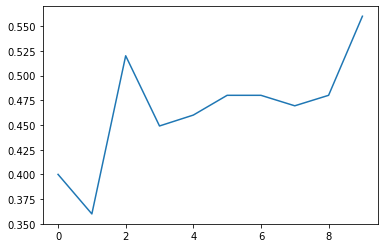

AVG ACCURACY: 0.46583673469387765
MAX ACCURACY: 0.56
MIN ACCURACY: 0.36
[0.4, 0.36, 0.52, 0.4489795918367347, 0.46, 0.48, 0.48, 0.46938775510204084, 0.48, 0.56]


In [64]:
accuracies_10 = execution(tagged_sentences, 10)
plt.plot(accuracies_10)
plt.show()
print(f"AVG ACCURACY: {sum(accuracies_10)/len(accuracies_10)}")
print(f"MAX ACCURACY: {max(accuracies_10)}")
print(f"MIN ACCURACY: {min(accuracies_10)}")
print(accuracies_10)

In [46]:
accuracies_100 = execution(tagged_sentences, 100)
plt.plot(accuracies_100)
plt.show()
print(f"AVG ACCURACY: {sum(accuracies_100)/len(accuracies_100)}")
print(f"MAX ACCURACY: {max(accuracies_100)}")
print(f"MIN ACCURACY: {min(accuracies_100)}")
print(accuracies_100)

Lemma('guest.n.01.guest')
Lemma('chapter.n.01.chapter')
Lemma('stern.n.01.stern')
Lemma('bravado.n.01.bravado')
Lemma('sunday.n.01.Sunday')
Lemma('song.n.01.song')
Lemma('corner.n.01.corner')
Lemma('mother.n.01.mother')
Lemma('situation.n.01.situation')
Lemma('detention.n.01.custody')
Lemma('lack.n.01.lack')
Lemma('hair.n.01.hair')
Lemma('merit.n.01.merit')
Lemma('attempt.n.01.effort')
Lemma('enzyme.n.01.enzyme')
Lemma('part.n.01.portion')
Lemma('presentation.n.02.demonstration')
Lemma('sister.n.01.sister')
Lemma('liter.n.01.liter')
Lemma('contact.n.01.contact')
Lemma('half-breed.n.01.half-breed')
Lemma('fact.n.01.fact')
Lemma('conversation.n.01.conversation')
Lemma('attitude.n.01.attitude')
Lemma('dad.n.01.pa')
Lemma('moonlight.n.01.moonlight')
Lemma('seashore.n.01.coast')
Lemma('criticism.n.01.criticism')
Lemma('unit_of_measurement.n.01.unit')
Lemma('mention.n.01.reference')
Lemma('foreigner.n.02.outsider')
Lemma('address.n.03.speech')
Lemma('effluent.n.01.effluent')
Lemma('houston.n

KeyboardInterrupt: 